In [1]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image, ImageEnhance ,ImageFilter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_mini = pd.read_csv('../datos/grabacion/datos_bo3_minimapa.csv')

In [3]:
df_mini.head(20)

,mini_01,mini_02,mini_03,mini_04,mini_05,mouse_final
0,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,"[572, 108]"
1,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,"[572, 108]"
2,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,"[2368, 445]"
3,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,"[572, 108]"
4,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,"[2368, 445]"
5,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,"[2893, 541]"
6,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,"[572, 108]"
7,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-11-5...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,"[2368, 445]"
8,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,"[2893, 541]"
9,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,datos/grabacion/mini_mapa/mini_mapa_26-12-12-0...,"[2848, 541]"


In [4]:
print(df_mini.shape)

(1374, 6)


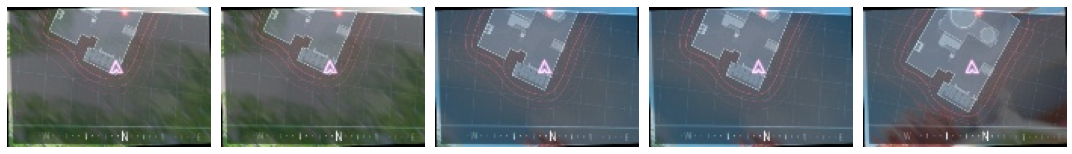

In [5]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(0,5):
    primera_fila = df_mini.iloc[0]
    imagen = Image.open("../" +str(primera_fila.iloc[i]))
    matriz_np = np.array(imagen)  

    axes[i].imshow(matriz_np)
    axes[i].axis('off')

plt.tight_layout()
plt.show()  

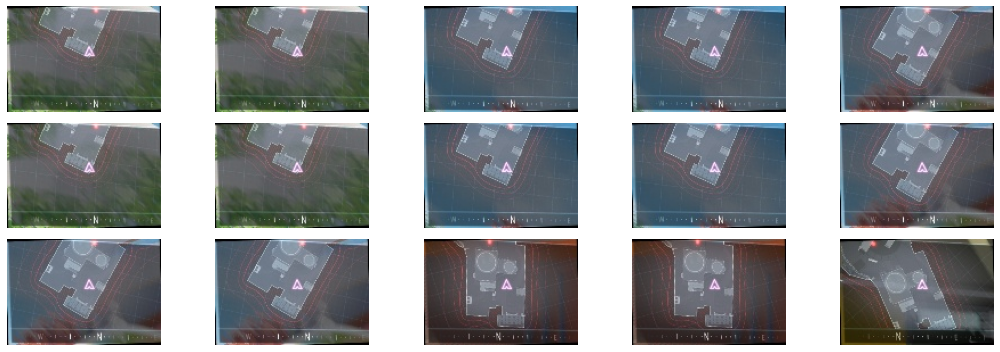

In [6]:
fig, axes = plt.subplots(3, 5, figsize=(15, 5))

for i in range(3): 
    for j in range(5):
        # Obtener la ruta de la imagen
        ruta_imagen = df_mini.iloc[i, j]  # Elimina los corchetes
        
        # Abrir la imagen y convertirla a matriz numpy
        imagen = Image.open("../" + ruta_imagen)
        matriz_np = np.array(imagen)
        
        # Mostrar la imagen en el subplot correspondiente
        axes[i, j].imshow(matriz_np)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Tamaño imagen -> (135, 93)
Tamaño matriz -> (93, 135, 3)


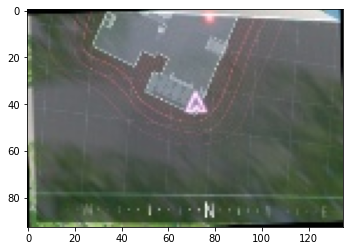

In [7]:
primera_fila = df_mini.iloc[0]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen)  
print("Tamaño imagen -> "+str(imagen.size))
print("Tamaño matriz -> "+ str(matriz_np.shape))
plt.imshow(matriz_np)
plt.axis('on')
plt.show()

# Prueba Filtros Imagenes Mapa

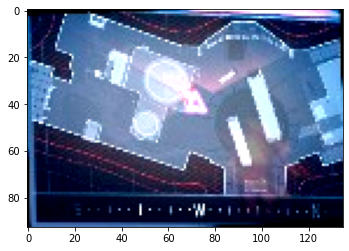

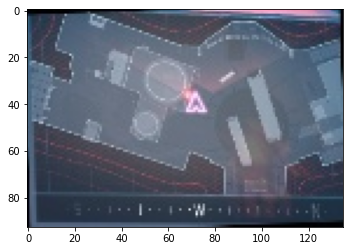

In [8]:
num_image = 18

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aumentar el contraste
enhancer = ImageEnhance.Contrast(Image.fromarray(matriz_np))
factor = 2.5  # Puedes ajustar este valor según tus necesidades
image_contrast = enhancer.enhance(factor)


plt.imshow(image_contrast)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

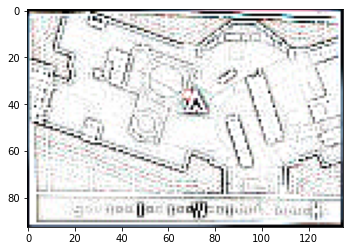

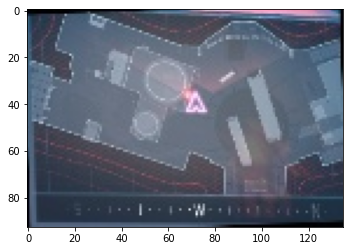

In [9]:
num_image = 18

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aplicamos Filtro
imagen_bordes = Image.fromarray(matriz_np).filter(ImageFilter.CONTOUR)

plt.imshow(imagen_bordes)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

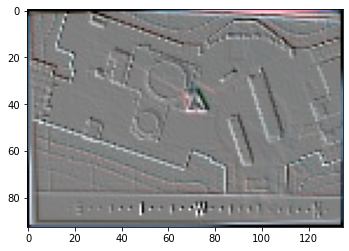

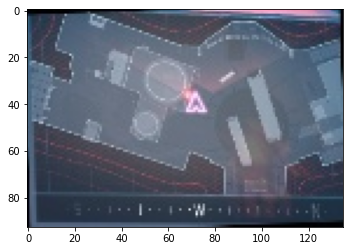

In [10]:
num_image = 18

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aplicamos Filtro
imagen_bordes = Image.fromarray(matriz_np).filter(ImageFilter.EMBOSS)

plt.imshow(imagen_bordes)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

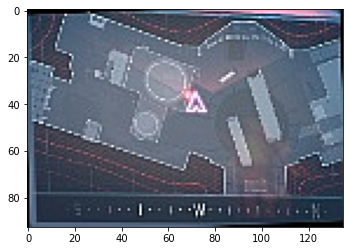

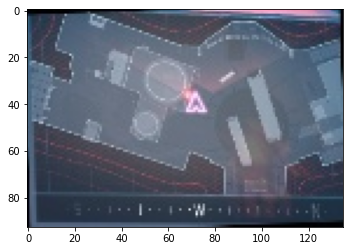

In [11]:
num_image = 18

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aplicamos Filtro
imagen_bordes = Image.fromarray(matriz_np).filter(ImageFilter.SHARPEN)

plt.imshow(imagen_bordes)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

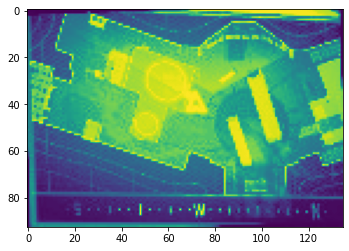

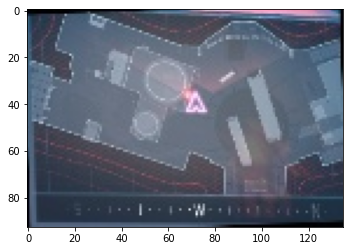

In [12]:
num_image = 18

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aplicar la equalización del histograma
imagen_gray = cv2.cvtColor(matriz_np, cv2.COLOR_RGB2GRAY)
imagen_equalizada = cv2.equalizeHist(imagen_gray)

plt.imshow(imagen_equalizada)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

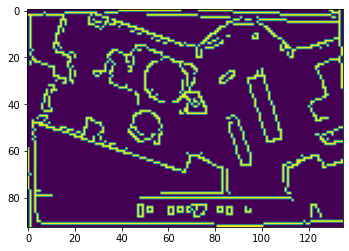

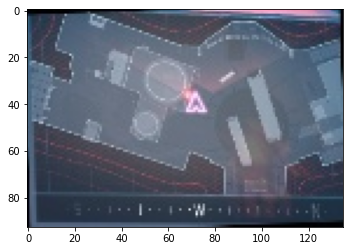

In [13]:
num_image = 18

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aplicar filtro Canny
imagen_gray = cv2.cvtColor(matriz_np, cv2.COLOR_RGB2GRAY)
imagen_equalizada = cv2.Canny(imagen_gray, 100, 200)

plt.imshow(imagen_equalizada)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

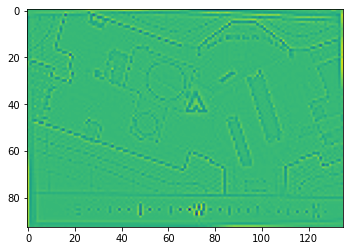

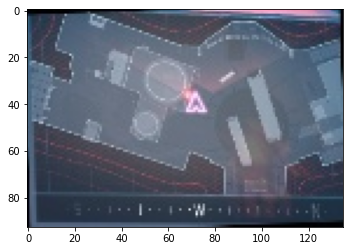

In [14]:
num_image = 18

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aplicar filtro Canny
imagen_gray = cv2.cvtColor(matriz_np, cv2.COLOR_RGB2GRAY)
imagen_equalizada = cv2.Laplacian(imagen_gray, cv2.CV_64F)

plt.imshow(imagen_equalizada)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

In [5]:
def comprobar_contenido(X_train , Y_train , num_video):

    fig, axs = plt.subplots(1, 5, figsize=(5 * 2, 1 * 2))

    for i in range(5):
        axs[i].imshow(X_train[num_video][i])
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()
    print("Etiqueta -> "+ str(Y_train[num_video]))
    return Y_train[num_video]

# CREACION BATCH_DISTRIBUTION

#### Dado que mi equipo no es lo suficientemente potente como para cargar todas las imgenes en la RAM
#### Procedo a crear una clase que distribuya mi Dataset en pequeños trozos conocidos como BATCHES

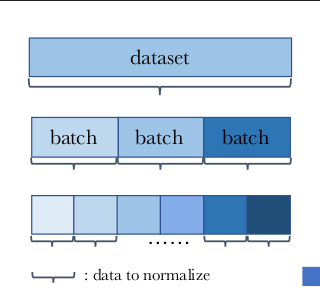

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model ,Sequential
from tensorflow.keras.layers import Input, TimeDistributed, MaxPooling2D, Flatten, Dense ,ConvLSTM2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import Sequence

2024-06-26 14:58:51.405622: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-26 14:58:51.434611: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI AVX512_BF16, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
class ImageDataGenerator(Sequence):
    def __init__(self, df , sequence_length ,image_height , image_width , batch_size=32, **kwargs):
        self.df = df
        self.image_sequence_length = sequence_length
        self.image_height = image_height
        self.image_width = image_width
        self.batch_size = batch_size
        super().__init__(**kwargs)  # Llamada al constructor de la clase base
        
    def __len__(self):
        return int(np.ceil(len(self.df) / float(self.batch_size)))
    
    def __getitem__(self, index):
        inicio_lote = index * self.batch_size
        final_lote = (index + 1) * self.batch_size
        
        batch_df = self.df.iloc[inicio_lote:final_lote]     #Obtenemos un lote del df
        
        X_batch = np.zeros((len(batch_df), self.image_sequence_length ,self.image_height, self.image_width, 3))  # Inicializar matriz para las imágenes
        y_batch = np.array([eval(mouse_final) for mouse_final in batch_df['mouse_final']])          #Almacenamos todas las label del df que corresponden al batch
        
        for i, (_, row) in enumerate(batch_df.iterrows()):
            frames = []
            for j in range(self.image_sequence_length):
                imagen = Image.open("../" + row.iloc[j])    # Obtener la ruta de la imagen
                #imagen = Image.fromarray(np.array(imagen)).filter(ImageFilter.SHARPEN)  #Aplicamos Filtro SHARPEN
                imagen = np.array(imagen) / 255.0           # Normalizar la imagen

                frames.append(imagen)                  #Juntamos frames en lista
            video = np.stack(frames, axis=0)           # Convertir lista de frames en un video np
            X_batch[i] = video
        
        return X_batch, y_batch

In [9]:
df_mini.shape

(1374, 6)

# CREACION MODELO LSTM_CNN

<div style="text-align:center;">
    <iframe width="360" height="240" src="https://www.youtube.com/embed/deVW91RR_lQ" title="Deep Learning - 05 17 CNN LSTM" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</div>

https://www.kaggle.com/code/alextrinity/multi-head-cnn-bigru-cross-attention

In [19]:
def creacion_modelo_convLSTM(input_shape):
    
    model = Sequential()
    model.add(Input(shape=input_shape))
    
    # Capa ConvLSTM_01
    model.add(ConvLSTM2D(filters= 128, kernel_size=(4, 4), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Dropout(0.2)))

    # Capa ConvLSTM_02
    model.add(ConvLSTM2D(filters= 64, kernel_size=(8, 8), 
                                    activation='relu', 
                                    padding='same', 
                                    return_sequences=True))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Dropout(0.2)))

    # Otra capa ConvLSTM_03 sin TimeDistribute
    '''
    model.add(ConvLSTM2D(filters=32, kernel_size=(8, 8), 
                         activation='relu', 
                         padding='same', 
                         return_sequences=False))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    '''
    
    
    # Capa densa adicional
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))  # Capa densa adicional
    model.add(Dense(2))  # Salida para regresión con 2 unidades (ejemplo)

    return model

# PREPARACIÒN ENTRENAMIENTO

In [10]:
# Modelo Mini-Mapa
X_train, X_test = train_test_split(df_mini, test_size=0.2, random_state=42)
X_train, X_valid = train_test_split(X_train, test_size=0.25, random_state=42)

print("Tamaño total: ",len(df_mini))
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))
print("Tamaño del conjunto de validación:", len(X_valid))

Tamaño total:  1374
Tamaño del conjunto de entrenamiento: 824
Tamaño del conjunto de prueba: 275
Tamaño del conjunto de validación: 275


In [11]:
altura_img_mini = 93
anchura_img_mini = 135
batch_size = 4 #imagenes por bach

In [12]:
# Generadores de Batches Mini-Mapa
train_generator = ImageDataGenerator(X_train, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size)
valid_generator = ImageDataGenerator(X_valid, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size)

In [13]:
#Cantidad de batches en los que se divide el df
train_generator.__len__()

206

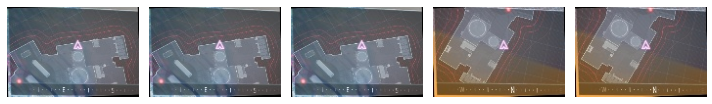

Etiqueta -> [2273  430]


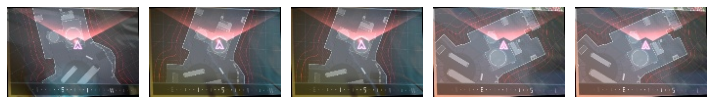

Etiqueta -> [2833  539]


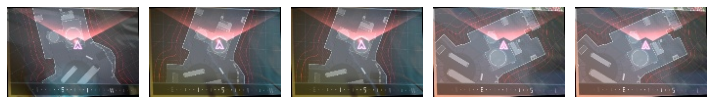

Etiqueta -> [2833  539]


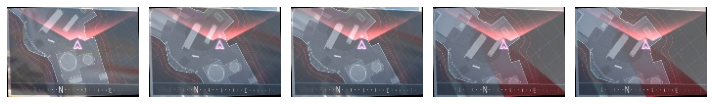

Etiqueta -> [2879  540]


In [24]:
#Comprobamos funcionamiento bach
# Obtenemos el batch numero (2)
X_batch, y_batch = train_generator.__getitem__(2)

for i in range(0,4):  # 4 es el maximo de conjunto de imagenes del batch creado
    # Seleccionamos ver la posicion numero 0 del batch creado
    comprobar_contenido(X_batch , y_batch,i)

In [25]:
# Modelo Mini-Mapa
timesteps = 5
height = 93
width = 135
channels = 3
input_shape = (timesteps, height, width, channels)

model_mini_mapa = creacion_modelo_convLSTM(input_shape)
model_mini_mapa.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

2024-06-26 13:34:41.628395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-26 13:34:41.971848: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-26 13:34:41.972037: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [26]:
model_mini_mapa.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 5, 93, 135, 128)   1073664   
                                                                 
 time_distributed (TimeDist  (None, 5, 46, 67, 128)    0         
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 5, 46, 67, 128)    0         
 stributed)                                                      
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 5, 46, 67, 64)     3145984   
                                                                 
 time_distributed_2 (TimeDi  (None, 5, 23, 33, 64)     0         
 stributed)                                                      
                                                        

In [27]:
# Verificar dispositivos disponibles
if tf.test.gpu_device_name():
    print('GPU encontrada:', tf.test.gpu_device_name())
else:
    print("No se encontró GPU. Se utilizará la CPU.")

GPU encontrada: /device:GPU:0


2024-06-26 13:34:48.349251: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-26 13:34:48.349447: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-26 13:34:48.349602: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [28]:
import time

# Registro del tiempo de inicio
start_time = time.time()

# Entrenamiento Mini-Mapa
history = model_mini_mapa.fit(train_generator, epochs=1000, validation_data=valid_generator, callbacks=[early_stopping])

# Registro del tiempo de finalización
end_time = time.time()

Epoch 1/1000


2024-06-26 13:34:54.065350: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-06-26 13:34:55.068258: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x73a0507d1370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-26 13:34:55.068274: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-06-26 13:34:55.121707: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-26 13:34:55.415840: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


206/206 [==============================] - 175s 831ms/step - loss: 6648.4443 - accuracy: 0.9964 - val_loss: 6512.2397 - val_accuracy: 1.0000
Epoch 2/1000
206/206 [==============================] - 169s 823ms/step - loss: 6664.3027 - accuracy: 1.0000 - val_loss: 6512.2397 - val_accuracy: 1.0000
Epoch 3/1000
206/206 [==============================] - 170s 824ms/step - loss: 6664.3052 - accuracy: 1.0000 - val_loss: 6512.2397 - val_accuracy: 1.0000
Epoch 4/1000
206/206 [==============================] - 170s 824ms/step - loss: 6664.3042 - accuracy: 1.0000 - val_loss: 6512.2397 - val_accuracy: 1.0000
Epoch 5/1000
206/206 [==============================] - 170s 824ms/step - loss: 6664.3032 - accuracy: 1.0000 - val_loss: 6512.2397 - val_accuracy: 1.0000
Epoch 6/1000
206/206 [==============================] - 170s 824ms/step - loss: 6664.3042 - accuracy: 1.0000 - val_loss: 6512.2397 - val_accuracy: 1.0000
Epoch 6: early stopping


In [ ]:
# Conversión de segundos a minutos
elapsed_minutes = elapsed_time / 60

print(f"El proceso tardó aproximadamente {elapsed_minutes:.2f} minutos en ejecutarse.")

In [29]:
# Evaluar el modelo en el conjunto de datos de prueba
test_loss, test_accuracy = model_mini_mapa.evaluate(valid_generator)

print(f'Loss en el conjunto de datos de prueba: {test_loss}')
print(f'Accuracy en el conjunto de datos de prueba: {test_accuracy}')

69/69 [==============================] - 16s 234ms/step - loss: 6512.2397 - accuracy: 1.0000
Loss en el conjunto de datos de prueba: 6512.23974609375
Accuracy en el conjunto de datos de prueba: 1.0


In [30]:
model_mini_mapa.save('../modelos/modelo_mapa.h5')

/usr/lib/python3/dist-packages/keras/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
